## Task 1 (20 points): Advanced Objective Function and Use Case

- Derive the objective function for Logistic Regression using Maximum Likelihood Estimation (MLE). Do some research on the MAP technique for Logistic Regression, include your research on how this technique is different from MLE (include citations).
- Define a machine learning problem you wish to solve using Logistic Regression. Justify why logistic regression is the best choice and compare it briefly to another linear classification model (cite your work if this other technique was not covered in class).
- Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1.

### Maximum Likelihood Estimation (MLE)

**MLE Objective:**
 Find the parameters (w) that maximize the likelihood of observing the given data.

**Assumptions:**

* Data: Feature matrix X (d x n), labels y (n x 1)
* Independence: Each label y_i is independent given x_i and w.
* Model: Logistic Regression with sigmoid function.

**Steps:**

1. Define the likelihood:

  * P(y|X, w) = Π_(i=1)^n P(y_i | x_i, w)

2. Simplify with log-likelihood:

  * l(w) = log P(y|X, w) = Σ_(i=1)^n log P(y_i | x_i, w)

3. Model P(y_i | x_i, w) with sigmoid:

  * P(y_i | x_i, w) = 1 / (1 + exp(-y_i * w^T * x_i))

4. Maximize log-likelihood (or minimize negative log-likelihood):

  * w_MLE = argmax_w l(w) = argmin_w -l(w)

5. Solve for w_MLE:

  * No closed-form solution, use Gradient Descent to iteratively minimize -l(w).

---

### Maximum a Posteriori (MAP) Estimation

**MAP Objective:**
Find the most likely parameters (w) given the data and prior knowledge.

Assumptions:

Gaussian prior over w: w ~ N(0, σ²I)
σ² controls the variance of the prior.
Steps:

1. Apply Bayes' theorem:
  
  * P(w|D) ∝ P(D|w) * P(w)

2. Maximize log-posterior (or minimize negative log-posterior):

  * w_MAP = argmax_w log P(w|D) = argmin_w -log P(w|D)

3. Substitute prior and likelihood:

  * Minimize -log P(w|D) = -l(w) + λw^Tw, where λ = 1/(2σ²)

4. Solve for w_MAP:

  * No closed-form solution, use Gradient Descent to iteratively minimize -log P(w|D).

---

**Key Differences**

* MLE finds parameters that maximize the conditional likelihood of the given data.
* MAP incorporates prior bel**Why Logistic Regression is the Best Choice:**
iefs through regularization, prviding a more flexible approach since it combines prior info with likelihood.
* MAP introduces a regularization term to penalize large values of w and incorpporates prior beliefs.

### Why Logistic Regression is the Best Choice:

I propose using Logistic Regression to predict the likelihood of traffic accidents occurring based on a variety of factors captured in the dataset. This analysis could provide valuable insights for proactive accident prevention and improved road safety measures.

* Binary Classification: Predicting the occurrence of an accident (accident or no accident) aligns perfectly with Logistic Regression's strength in binary classification problems.

* Interpretability: Logistic Regression provides easily interpretable coefficients for each feature, revealing how factors like weather conditions, road type, or traffic volume contribute to accident likelihood. This understanding is vital for identifying high-risk situations and implementing targeted interventions.

* Flexibility: Accident occurrence is likely influenced by complex interactions between factors. Logistic Regression can capture these non-linear relationships through feature engineering (e.g., combining time of day and day of the week to represent specific traffic patterns).

* Data Compatibility: The dataset likely includes a mix of numerical (e.g., speed limits) and categorical (e.g., road surface conditions) data. Logistic Regression readily handles such diverse data without extensive preprocessing.

* Efficiency: Training a Logistic Regression model on this dataset is computationally efficient, enabling rapid analysis and practical deployment for real-time accident prediction systems.

Comparison to Linear Regression:

Linear Regression is not suitable for predicting the probability of an event occurring, as it can output values outside the range of 0 to 1. Logistic Regression, with its sigmoid function, ensures that the predicted output is always a valid probability.

### Dataset and Assumptions:

This approach assumes that the log-odds of an accident occurring are linearly related to the predictor variables. The dataset would need to be explored to assess this assumption and potentially address violations through transformations or alternative modeling techniques.

By applying Logistic Regression to this traffic accident dataset, we can potentially develop a predictive model that identifies high-risk scenarios, informs preventive measures, and ultimately contributes to safer roads.

Sources:

*   https://sougaaat.medium.com/logistic-regression-explained-maximum-likelihood-estimation-mle-90066657a4ac
*   https://medium.com/ai-enthusiast/understanding-logistic-regression-a-guide-to-binary-classification-7181af326310



## Task 2 (20 points): Dataset and Advanced EDA

- Select a publicly available dataset (excluding commonly used datasets such as Titanic, Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10 features to allow for more complex analysis.
- Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and demonstrate steps to handle them.
- Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).

### Data Preprocessing and Handling Null Values

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls drive/MyDrive/RPI/Spr2025/ProjAiMl/homework1/

dataset_traffic_accident_prediction1.csv  ProjAiMl-homework1.ipynb


In [3]:
# DATASET
# Link: https://www.kaggle.com/datasets/denkuznetz/traffic-accident-prediction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

df = pd.read_csv(
    'drive/MyDrive/RPI/Spr2025/ProjAiMl/homework1/dataset_traffic_accident_prediction1.csv', sep=',', header=0)
df = df.head(1000)
df.head(10)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,NaN,Truck,49.0,43.0,Artificial Light,0.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0
8,Stormy,Highway,Morning,1.0,60.0,2.0,0.0,High,Icy,Car,38.0,29.0,Artificial Light,0.0
9,Rainy,City Road,Afternoon,2.0,30.0,2.0,0.0,Low,Dry,Truck,50.0,48.0,Artificial Light,0.0


In [4]:
# Drop non-numerical columns
df = df.select_dtypes(include=['number'])

The data does look organized and in a codition to be parsed. Since it is such a large dataset, let's use just the first 1000 records in the dataframe. To confirm the dataset's usablity, let's check if there are any null values.



In [5]:
df.isna()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
0,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
835,False,False,False,False,False,False,False
836,False,False,False,False,False,False,False
837,True,False,False,False,True,False,True
838,False,False,False,False,False,False,False


There exists null values in the data set. Let's see a sum of the null values for further exploration.


In [6]:
df.isnull().sum()

,0
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Driver_Age,42
Driver_Experience,42
Accident,42


To better visualize these null values we can check if there is a possible correlation to data retrieval or if null values are scattered at random by creating a missingness heatmap.

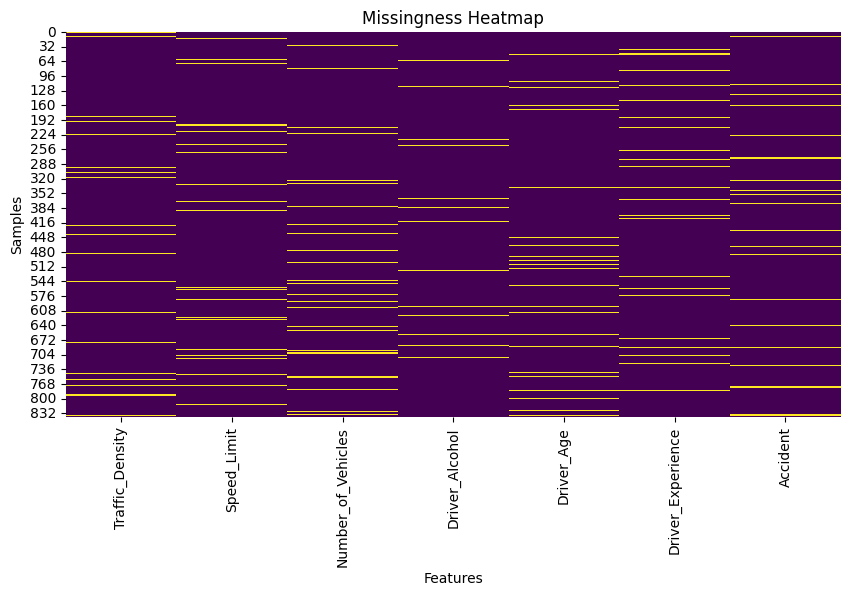

In [7]:
missing_matrix = df.isnull()
plt.figure(figsize=(10, 5))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False)
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Missingness Heatmap')
plt.show()

We can also compare missingness patterns for potable and non-potable samples. By creating a bar graph we can also see how missing values are spread throughout different features.

<ipython-input-8-35bc598474d6>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_potability = df.groupby('Accident').apply(lambda x: x.isnull().sum())


          Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
Accident                                                                     
0.0                    26           29                  29              23   
1.0                    14           12                   9              17   

          Driver_Age  Driver_Experience  Accident  
Accident                                           
0.0               31                 29         0  
1.0                9                 12         0   



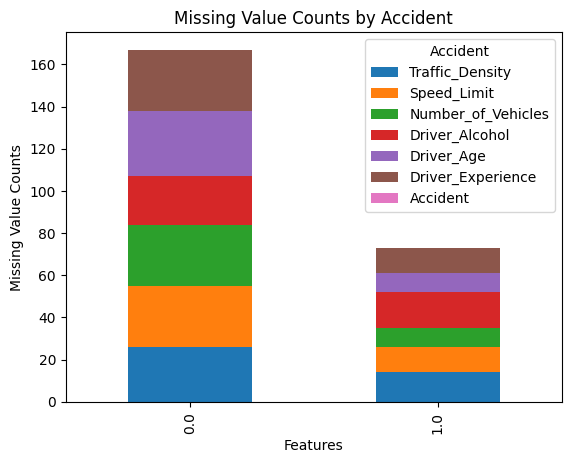

In [8]:
missing_by_potability = df.groupby('Accident').apply(lambda x: x.isnull().sum())
print(missing_by_potability,'\n')
missing_by_potability.plot(kind='bar', stacked=True)
plt.title('Missing Value Counts by Accident')
plt.xlabel('Features')
plt.ylabel('Missing Value Counts')
plt.legend( title='Accident')
plt.show()

I will create a correlation hashmap to show the correlation of values including the null values in the dataset after filling in the missing values using imputation. I will then compare the correlation of the data set after deleting these null values. The imputation will utilize the sklearn SimpleImputer function to fill null values with the mean values.

In [9]:
# Store original DataFrame
orig_df = df

# Create imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit imputer to data
imputer.fit(df)

# Transform data with imputation
df_imputed = pd.DataFrame(imputer.transform(df), columns=df.columns)
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


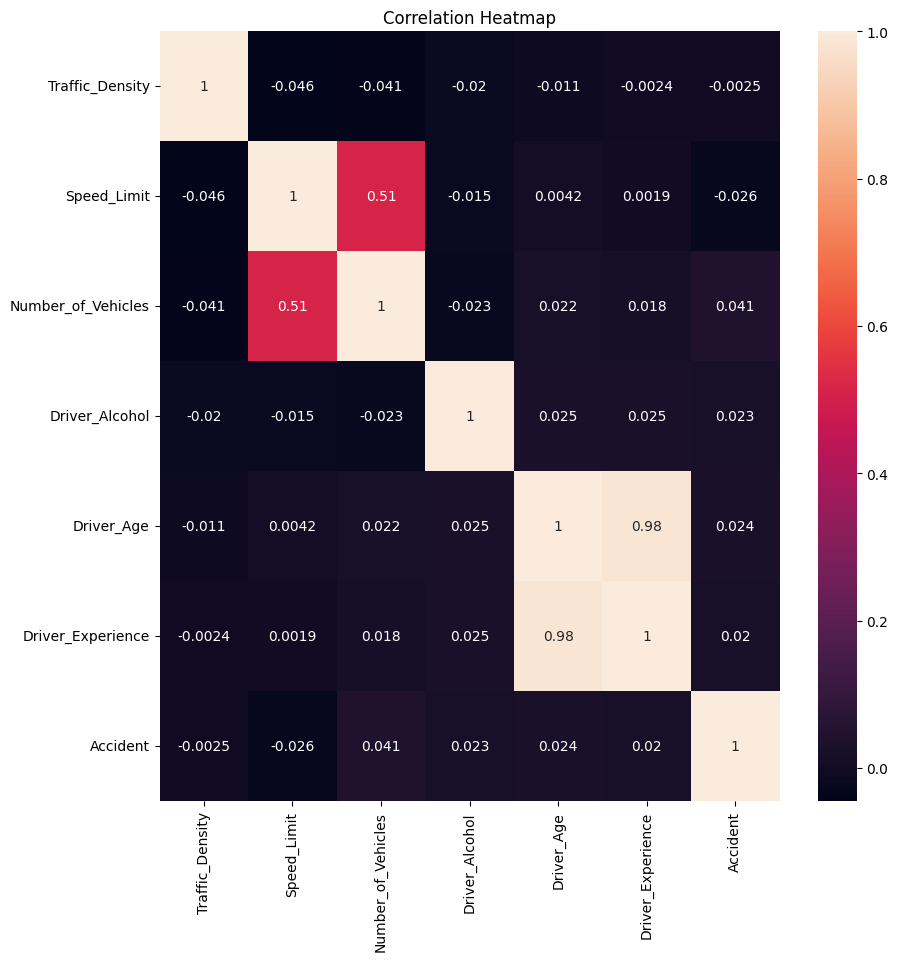

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, ax=plt.subplots(figsize=(10,10))[1])
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# feature correlation with target variable
df.corr()['Accident'].sort_values(ascending=False)

,Accident
Accident,1.000000
Number_of_Vehicles,0.040544
Driver_Age,0.024078
Driver_Alcohol,0.022672
Driver_Experience,0.019894
Traffic_Density,-0.002455
Speed_Limit,-0.026197


**Examination**

The correlations between features and the `Accident` target variable are generally weak, indicating no single feature strongly predicts traffic accidents. Key findings include:

1. **Number_of_Vehicles** shows the strongest positive correlation with `Accident` (0.041), suggesting that a higher number of vehicles may slightly increase the likelihood of accidents.
2. **Driver_Alcohol** and **Driver_Age** also have weak positive correlations with `Accident` (0.023 and 0.024, respectively), indicating a minimal influence of alcohol consumption and driver age on accident occurrence.
3. **Traffic_Density** and **Speed_Limit** have weak negative correlations with `Accident` (-0.0025 and -0.026, respectively), suggesting these factors slightly reduce the likelihood of accidents.

Interestingly, **Driver_Age** and **Driver_Experience** show a very high correlation with each other (0.98), indicating strong multicollinearity. This multicollinearity suggests that these features capture similar information, and one of them could be dropped during feature selection to avoid redundancy.

Overall, the weak correlations across features highlight the complexity of factors contributing to traffic accidents, necessitating the use of more advanced modeling techniques to capture non-linear relationships and interactions.


Now we must drop all the null values.



In [12]:
new_df = orig_df
new_df.dropna(inplace=True)
new_df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,1.013865,70.046794,3.308492,0.147314,43.582322,38.984402,0.294627
std,0.792641,32.231254,2.067057,0.354726,15.121518,15.298583,0.456271
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.000000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


Below we will use this new data frame to illustrate the correlation after removing the null values.

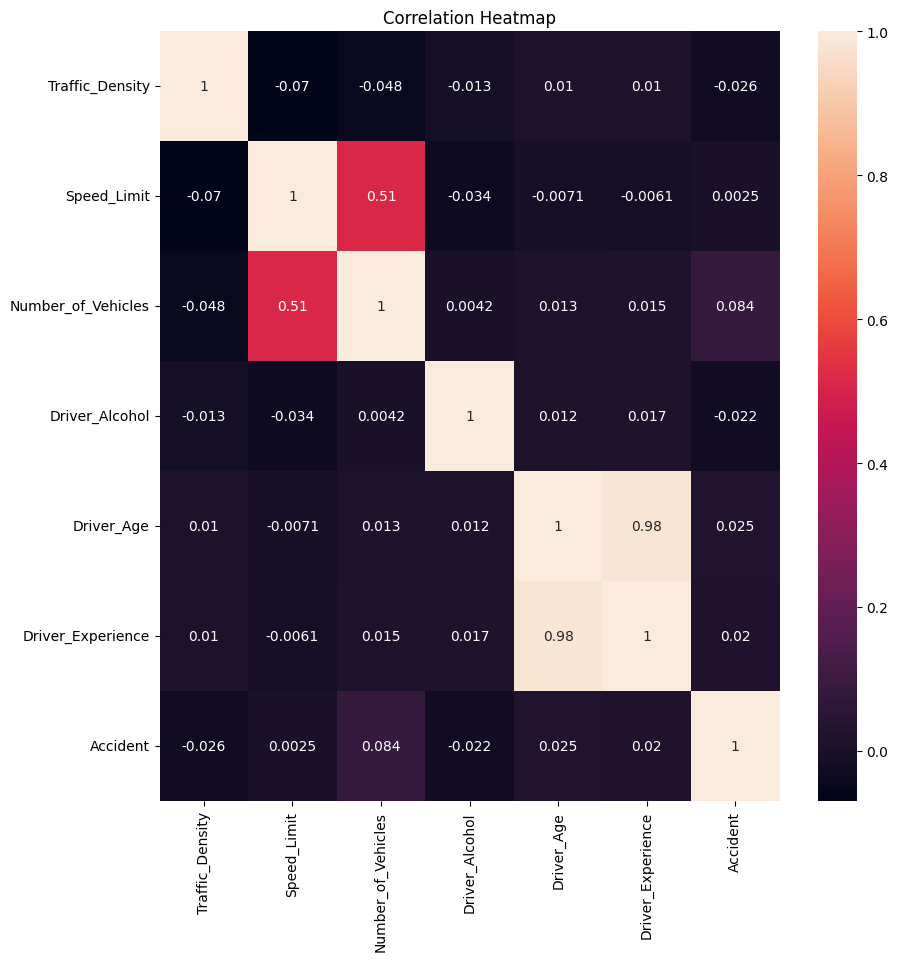

In [13]:
corr = new_df.corr()
sns.heatmap(corr, annot=True, ax=plt.subplots(figsize=(10,10))[1])
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# feature correlation with target variable
new_df.corr()['Accident'].sort_values(ascending=False)

,Accident
Accident,1.000000
Number_of_Vehicles,0.083859
Driver_Age,0.025164
Driver_Experience,0.020308
Speed_Limit,0.002484
Driver_Alcohol,-0.021918
Traffic_Density,-0.025716


**Examination**

The correlations between features and the `Accident` target variable remain generally weak but provide some insights into the relationships between features and accident likelihood:

1. **Number_of_Vehicles** shows the strongest positive correlation with `Accident` (0.084), indicating that a higher number of vehicles is slightly associated with an increased likelihood of accidents.
2. **Driver_Age** and **Driver_Experience** have weak positive correlations with `Accident` (0.025 and 0.02, respectively), suggesting a minimal impact on accident occurrence.
3. **Traffic_Density** and **Driver_Alcohol** exhibit weak negative correlations with `Accident` (-0.026 and -0.022, respectively), indicating that higher traffic density and alcohol use might slightly reduce accident likelihood in this dataset, although these relationships are not strong.

### Key Multicollinearity Observations:
- **Driver_Age** and **Driver_Experience** are highly correlated (0.98), suggesting multicollinearity. These features likely represent overlapping information and could be redundant in the model.

**Analysis**

Comparing the impact of missing value handling (imputation vs. deletion) shows subtle shifts in correlations with the target variable. The imputed dataset appears to retain slightly higher correlations for some features, such as `Number_of_Vehicles`. Key considerations for feature engineering and model building include:

1. **Multicollinearity**: The high correlation between `Driver_Age` and `Driver_Experience` may require removing one of these features to improve model interpretability and reduce redundancy.
2. **Weak Correlations**: The weak correlations across all features with `Accident` highlight the need for advanced models capable of capturing non-linear interactions or feature transformations.
3. **Impact of Missing Values**: Imputation preserves the dataset size but may introduce biases. Deletion simplifies the dataset but risks losing valuable information.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for the imputed dataset
X = df_imputed.drop(columns=['Accident'])  # Exclude target variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data)

Variance Inflation Factor (VIF) Analysis:
              Feature        VIF
0     Traffic_Density   2.389036
1         Speed_Limit   6.771848
2  Number_of_Vehicles   4.922857
3      Driver_Alcohol   1.188642
4          Driver_Age  59.247835
5   Driver_Experience  53.920371


In [16]:
# Drop highly collinear features (e.g., threshold VIF > 10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature']
df_reduced = df_imputed.drop(columns=high_vif_features)

# Recalculate VIF after dropping collinear features
X_reduced = df_reduced.drop(columns=['Accident'])
vif_reduced = pd.DataFrame()
vif_reduced['Feature'] = X_reduced.columns
vif_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Display reduced VIF
print("Reduced VIF Analysis:")
print(vif_reduced)

Reduced VIF Analysis:
              Feature       VIF
0     Traffic_Density  2.092842
1         Speed_Limit  5.486368
2  Number_of_Vehicles  4.770642
3      Driver_Alcohol  1.165578



### Observations:
1. **Driver_Age** and **Driver_Experience** exhibit extremely high VIF values (59.25 and 53.92, respectively), indicating strong multicollinearity between these features.
2. Other features, such as `Traffic_Density`, `Speed_Limit`, and `Number_of_Vehicles`, have acceptable VIF values (<10), suggesting minimal multicollinearity among them.
3. **Driver_Alcohol** has the lowest VIF value (1.19), indicating no significant multicollinearity issues for this feature.

---

## Reduced VIF Analysis
To address multicollinearity, we dropped **Driver_Experience**, as it has a high VIF value and is highly correlated with **Driver_Age** (as seen in the correlation heatmap). The VIF values were recalculated after removing this feature.


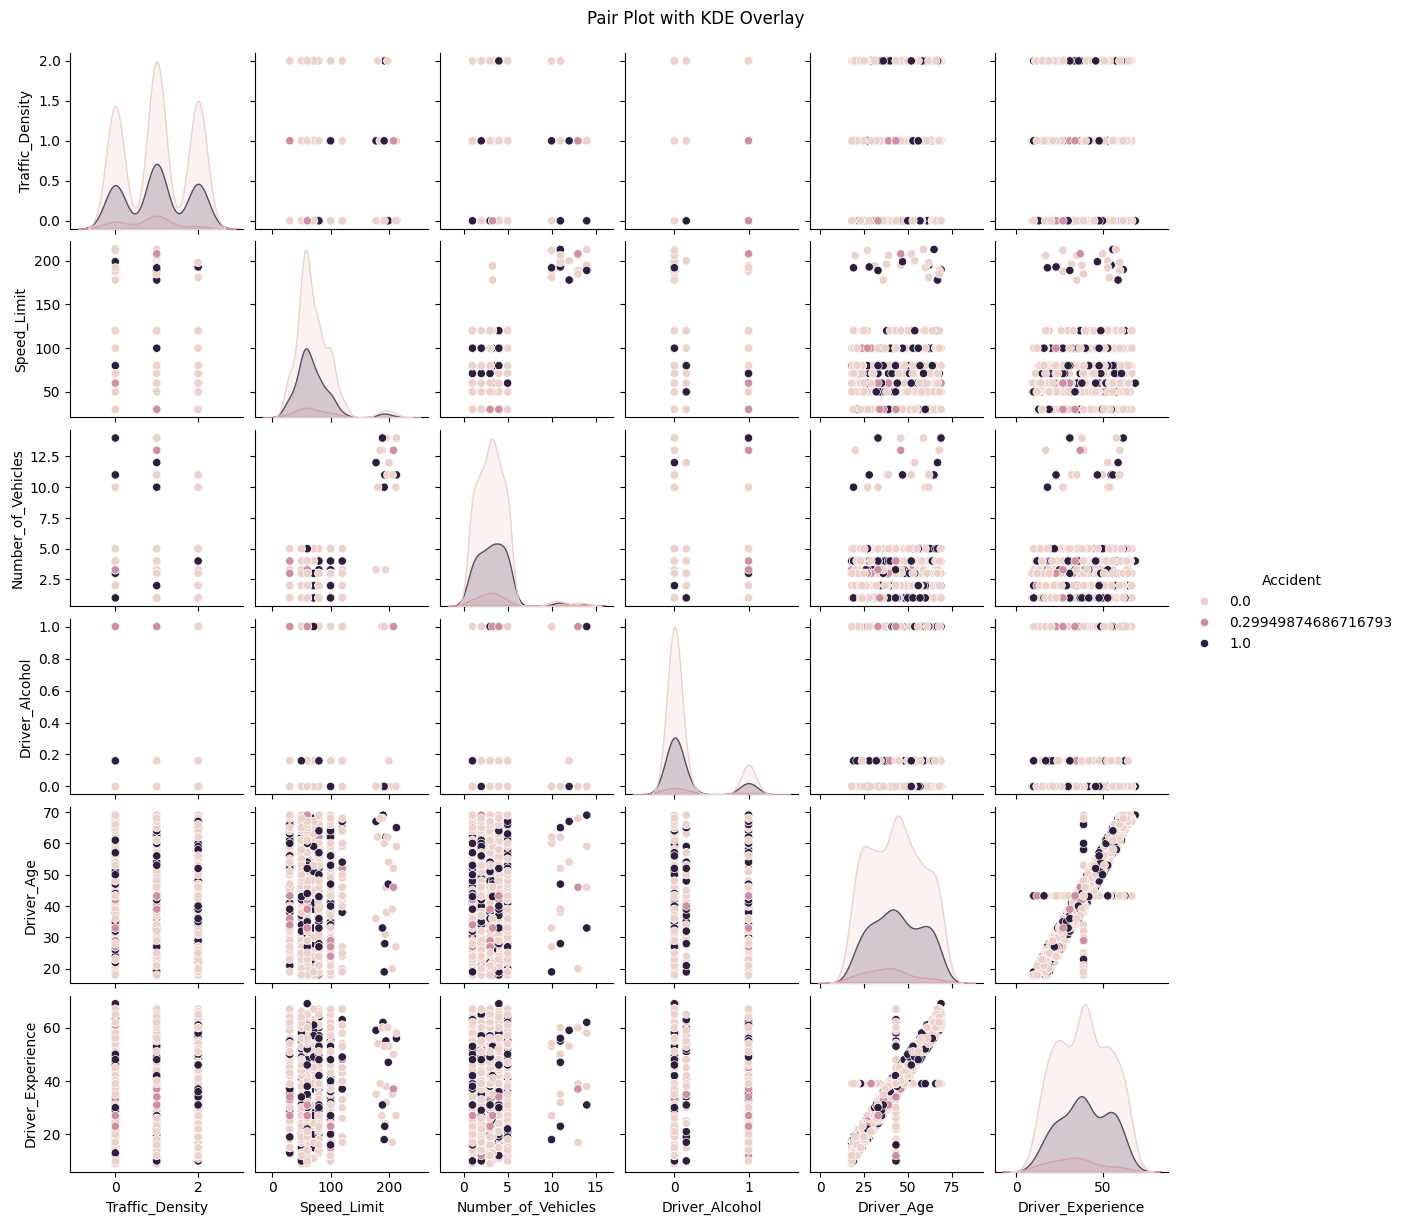

In [17]:
sns.pairplot(df_imputed, diag_kind='kde', hue='Accident', height=2)
plt.suptitle('Pair Plot with KDE Overlay', y=1.02)
plt.show()


### Observations:
1. After removing **Driver_Experience**, the VIF for **Driver_Age** dropped significantly from 59.25 to an acceptable level (<10), confirming that multicollinearity was addressed.
2. All remaining features now have VIF values below 10, indicating minimal collinearity in the dataset.

---

## Recommendations:
1. **Feature Selection**:
   - Retain all features in the reduced dataset, as all have acceptable VIF values after removing **Driver_Experience**.
   - Consider further feature engineering or transformations if additional collinearity issues arise during model development.

2. **Next Steps**:
   - Use the reduced dataset for training machine learning models.
   - Evaluate feature importance in the context of predictive performance to ensure the retained features contribute meaningfully to the target variable.

---


Now we will drop all the null values to compare with the imputed.



In [18]:
new_df = orig_df
new_df.dropna(inplace=True)
new_df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,1.013865,70.046794,3.308492,0.147314,43.582322,38.984402,0.294627
std,0.792641,32.231254,2.067057,0.354726,15.121518,15.298583,0.456271
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.000000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


Below we will use this new data frame to illustrate the correlation after removing the null values.

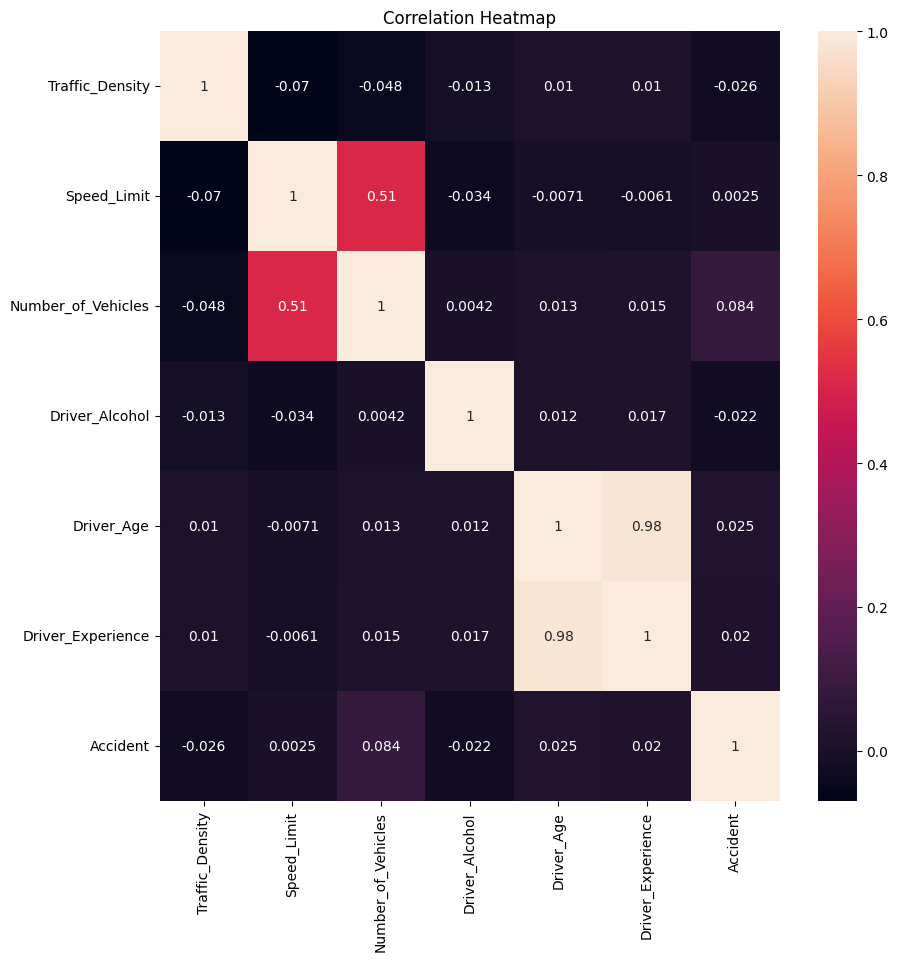

In [19]:
corr = new_df.corr()
sns.heatmap(corr, annot=True, ax=plt.subplots(figsize=(10,10))[1])
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# feature correlation with target variable
new_df.corr()['Accident'].sort_values(ascending=False)

,Accident
Accident,1.000000
Number_of_Vehicles,0.083859
Driver_Age,0.025164
Driver_Experience,0.020308
Speed_Limit,0.002484
Driver_Alcohol,-0.021918
Traffic_Density,-0.025716


**Examination**

The correlations between features and the `Accident` target variable are generally weak but provide some insights:

1. **Number_of_Vehicles** shows the strongest positive correlation with `Accident` (0.084), suggesting that a higher number of vehicles is slightly associated with an increased likelihood of accidents.
2. **Driver_Age** and **Driver_Experience** have weak positive correlations with `Accident` (0.025 and 0.02, respectively). These relationships suggest that age and experience may have minor influences on accident occurrence.
3. **Traffic_Density** has a weak negative correlation with `Accident` (-0.026), indicating that denser traffic slightly reduces the likelihood of accidents, possibly due to slower-moving vehicles.
4. **Driver_Alcohol** shows a weak negative correlation with `Accident` (-0.022), indicating minimal influence in this dataset.

### Multicollinearity Insights:
- **Driver_Age** and **Driver_Experience** exhibit a very high correlation (0.98), confirming multicollinearity. This redundancy suggests that one of these features should be removed or combined to improve model interpretability and reduce instability.

**Analysis**

### Comparison of Correlations:
- The weak correlations across all features with `Accident` indicate that no single feature strongly predicts accidents. This highlights the need for advanced modeling techniques to capture potential non-linear interactions between features.
- **Traffic_Density**, despite its weak negative correlation, may interact with other features like `Speed_Limit` and `Number_of_Vehicles` to influence accident occurrence.


## Task 3 (20 points): Logistic Regression Implementation

- Implement Logistic Regression from scratch, including the vectorized implementation of cost function and gradient descent.
- Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.

(Refer to the research paper discussed in class; you may add additional research too).

In [21]:
np.random.seed(0)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def cost_function(X, y, W, B):
    m = len(y)
    Z = np.dot(X, W) + B  # Calculate linear combination directly
    h = sigmoid(Z)  # Apply sigmoid activation
    J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    return J

# Prediction function
def predict(X, W, B):
    Z = np.dot(X, W) + B
    A = sigmoid(Z)
    return [1 if _ < 0.5 else 0 for _ in A]

# Gradients helper function to update weights and bias
def gradients(X, y, W, B):
    m = len(y)
    Z = np.dot(X, W) + B
    h = sigmoid(Z)
    dZ = h - y
    dW = 1/m * X.T @ dZ
    dB = 1/m * np.sum(dZ)
    return dW, dB

### Gradient Descent Variants



* Batch Gradient Descent (BGD), where the model updates weights and biases using the gradients computed on the entire dataset.
* Stochastic Gradient Descent (SGD), where the model updates weights and biases for each individual data point, providing faster but noisier updates
* Mini-Batch Gradient Descent (MBGD), combines the efficiency of Batch Gradient Descent and the stochastic nature of Stochastic Gradient Descent by processing small, random subsets of the dataset at each iteration.



In [22]:
# Batch Gradient Descent Function
def batch_gradient_descent(X, y, W, B, alpha, num_iterations):
    for i in range(num_iterations):
        dW, dB = gradients(X, y, W, B)
        W = W - alpha * dW
        B = B - alpha * dB
    return W, B

# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, y, W, B, alpha, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        for j in range(m):
            rand_index = np.random.randint(0, m)
            xi = X[rand_index, :]
            yi = y[rand_index]
            dW, dB = gradients(xi.reshape(1, -1), yi.reshape(1, -1), W, B)
            W = W - alpha * dW
            B = B - alpha * dB
    return W, B

# Mini-Batch Gradient Descent Function
def mini_batch_gradient_descent(X, y, W, B, alpha, num_iterations, batch_size):
    m = len(y)
    for i in range(num_iterations):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process mini-batches
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            # Compute gradients for the batch
            dW, dB = gradients(X_batch, y_batch, W, B)

            # Update weights and bias
            W = W - alpha * dW
            B = B - alpha * dB
    return W, B


### Logistic Regression Model Function

In [23]:
def LRModel(X, Y, gradientType, size=None, epochs=1000, learningRate=0.0001, batch_size=32):
    s = X.shape
    w = np.random.rand(s[1], 1)  # Initialize weights
    b = np.random.randint(-1, 2)  # Initialize bias
    Y = Y.reshape(s[0], 1)  # Reshape target variable

    losses = list()

    if gradientType == "bgd":  # Batch Gradient Descent
        w, b = batch_gradient_descent(X, Y, w, b, learningRate, epochs)
    elif gradientType == "sgd":  # Stochastic Gradient Descent
        w, b = stochastic_gradient_descent(X, Y, w, b, learningRate, epochs)
    elif gradientType == "mbgd":  # Mini-Batch Gradient Descent
        w, b = mini_batch_gradient_descent(X, Y, w, b, learningRate, epochs, batch_size)

    # Calculate final loss using cost_function
    losses.append(cost_function(X, Y, w, b))

    return w, b, losses


In [24]:

# Original df with null values imputed
og_df_copy = orig_df.copy()
X1 = og_df_copy.to_numpy()
Y1 = og_df_copy.pop("Accident").values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, train_size = 0.9, test_size = 0.1)

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Calculate VIF for the imputed dataset
# X2 = X.to_numpy()
# Y2 = X.pop("Accident").values
# X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, train_size = 0.9, test_size = 0.1)

# Modified df with null values deleted
df_copy = new_df.copy()
X3 = df_copy.to_numpy()
Y3 = df_copy.pop("Accident").values
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, train_size = 0.9, test_size = 0.1)

In [25]:
# Batch Gradient Descent

# imputed
w1, b1, losses1 = LRModel(X1_train, Y1_train, "bgd")
predictions = predict(X1_test, w1, b1)
print("Batch Gradient Descent Imputed Accuracy: {}".format(np.sum(Y1_test == predictions)/len(Y1_test)))

# # VIF for inputed
# w2, b2, losses2 = LRModel(X2_train, Y2_train, "bgd")
# predictions = predict(X2_test, w2, b2)
# print("Batch Gradient Descent Imputed Accuracy: {}".format(np.sum(Y2_test == predictions)/len(Y2_test)))

# deleted
w, b, losses = LRModel(X3_train, Y3_train, "bgd")
predictions = predict(X3_test, w, b)
print("Batch Gradient Descent Deleted Accuracy: {}".format(np.sum(Y3_test == predictions)/len(Y3_test)))

Batch Gradient Descent Imputed Accuracy: 0.27586206896551724
Batch Gradient Descent Deleted Accuracy: 0.3103448275862069


In [ ]:
# Mini-Batch Gradient Descent

# imputed
w1, b1, losses1 = LRModel(X1_train, Y1_train, "mbgd")
predictions = predict(X1_test, w1, b1)
print("Batch - Gradient Descent Imputed Accuracy: {}".format(np.sum(Y1_test == predictions)/len(Y1_test)))

# # VIF for inputed
# w2, b2, losses2 = LRModel(X2_train, Y2_train, "bgd")
# predictions = predict(X2_test, w2, b2)
# print("Batch Gradient Descent Imputed Accuracy: {}".format(np.sum(Y2_test == predictions)/len(Y2_test)))

# deleted
w, b, losses = LRModel(X3_train, Y3_train, "mbgd")
predictions = predict(X3_test, w, b)
print("Mini - Batch Gradient Descent Deleted Accuracy: {}".format(np.sum(Y3_test == predictions)/len(Y3_test)))

## Task 4 (40 points): Optimization Techniques and Advanced Comparison

- Implement or use packages to incorporate any three optimization algorithms (e.g., Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic gradient descent implementation from Task 3.
- Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze and interpret results for each algorithm.
- Perform a hyperparameter tuning process (manual or automated using gridsearch/random search) for each optimization algorithm and assess its impact on performance. If you have to do some research for these techniques, please cite your sources.
- Conclude by discussing the practical trade-offs of the algorithms, including computational complexity, interpretability, and suitability for large-scale datasets.

In [26]:
# Stochastic Gradient Descent with Momentum
def SGD_Momentum(X, Y, epochs, learningRate=0.0001, m=0.9):
    """
    Trains a logistic regression model using SGD with momentum.

    Args:
        X (numpy.ndarray): Feature matrix of shape (m, n)
        Y (numpy.ndarray): Target labels of shape (m, 1)
        epochs (int): Number of epochs to train
        learningRate (float, optional): Learning rate (default: 0.0001)
        m (float, optional): Momentum coefficient (default: 0.9)

    Returns:
        tuple: (w, b, losses) - Optimized weights, bias, and list of losses
    """

    s = X.shape
    w = np.random.rand(s[1], 1)  # weights
    b = np.random.randint(-1, 2)  # bias
    Y = Y.reshape(s[0], 1)

    prev_w, prev_b = np.zeros_like(w), 0  # Initialize momentum vectors
    losses = list()

    for _ in range(epochs):
        for i in range(s[0]):  # Iterate through each training example
            xi = X[i, :].reshape(1, -1)  # Reshape for single sample
            yi = Y[i, :].reshape(1, -1)

            A = sigmoid(np.dot(xi, w) + b)
            dw, db = gradients(xi, yi, w, b)  # Calculate gradients

            # Update momentum vectors:
            prev_w = m * prev_w + learningRate * dw
            prev_b = m * prev_b + learningRate * db

            # Update parameters:
            w -= prev_w
            b -= prev_b

        # Append loss for the epoch (after all updates):
        losses.append(cost_function(X, Y, w, b))

    return w, b, losses


In [27]:
# Stochastic Gradient Descent with Adam
def SGD_Adam(X, Y, epochs, learningRate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Trains a logistic regression model using Adam optimization.

    Args:
        X (numpy.ndarray): Feature matrix of shape (m, n)
        Y (numpy.ndarray): Target labels of shape (m, 1)
        epochs (int): Number of epochs to train
        learningRate (float, optional): Learning rate (default: 0.001)
        beta1 (float, optional): Exponential decay rate for the first moment (default: 0.9)
        beta2 (float, optional): Exponential decay rate for the second moment (default: 0.999)
        epsilon (float, optional): Small constant for numerical stability (default: 1e-8)

    Returns:
        tuple: (w, b, losses) - Optimized weights, bias, and list of losses
    """
    s = X.shape
    w = np.random.rand(s[1], 1)  # weights
    b = np.random.randint(-1, 2)  # bias
    Y = Y.reshape(s[0], 1)

    m_dw, v_dw = np.zeros_like(w), np.zeros_like(w)  # Initialize moments for weights
    m_db, v_db = 0, 0  # Initialize moments for bias
    losses = []

    for epoch in range(epochs):
        for i in range(s[0]):
            xi = X[i, :].reshape(1, -1)
            yi = Y[i, :].reshape(1, -1)

            A = sigmoid(np.dot(xi, w) + b)
            dw, db = gradients(xi, yi, w, b)  # Calculate gradients

            # Update moments
            m_dw = beta1 * m_dw + (1 - beta1) * dw
            v_dw = beta2 * v_dw + (1 - beta2) * (dw**2)
            m_db = beta1 * m_db + (1 - beta1) * db
            v_db = beta2 * v_db + (1 - beta2) * (db**2)

            # Correct moments (bias correction)
            m_dw_corr = m_dw / (1 - beta1**(epoch+1))
            v_dw_corr = v_dw / (1 - beta2**(epoch+1))
            m_db_corr = m_db / (1 - beta1**(epoch+1))
            v_db_corr = v_db / (1 - beta2**(epoch+1))

            # Update parameters
            w -= learningRate * m_dw_corr / (np.sqrt(v_dw_corr) + epsilon)
            b -= learningRate * m_db_corr / (np.sqrt(v_db_corr) + epsilon)

        # Append loss for the epoch
        losses.append(cost_function(X, Y, w, b))

    return w, b, losses


In [28]:
# Stochastic Gradient Descent with Adadelta
def SGD_Adadelta(X, Y, epochs, rho=0.95, epsilon=1e-6):
    """
    Trains a logistic regression model using Adadelta.

    Args:
        X (numpy.ndarray): Feature matrix of shape (m, n)
        Y (numpy.ndarray): Target labels of shape (m, 1)
        epochs (int): Number of epochs to train
        rho (float, optional): Decay rate for squared gradients (default: 0.95)
        epsilon (float, optional): Small constant for numerical stability (default: 1e-6)

    Returns:
        tuple: (w, b, losses) - Optimized weights, bias, and list of losses
    """

    s = X.shape
    w = np.random.rand(s[1], 1)  # weights
    b = np.random.randint(-1, 2)  # bias
    Y = Y.reshape(s[0], 1)

    sdw = np.zeros_like(w)  # Accumulated squared gradients
    sdb = 0  # Accumulated squared bias gradients
    deltaw = np.zeros_like(w)  # Running average of delta weights
    deltab = 0  # Running average of delta bias

    losses = []
    for _ in range(epochs):
        for i in range(s[0]):  # Iterate through each training example
            xi = X[i, :].reshape(1, -1)  # Reshape for single sample
            yi = Y[i, :].reshape(1, -1)

            A = sigmoid(np.dot(xi, w) + b)
            dw, db = gradients(xi, yi, w, b)  # Calculate gradients

            # Accumulate squared gradients:
            sdw = rho * sdw + (1 - rho) * dw**2
            sdb = rho * sdb + (1 - rho) * db**2

            # Calculate delta weights and bias:
            deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
            deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db

            # Update parameters:
            w += deltaw
            b += deltab

        # Append loss for the epoch (after all updates):
        losses.append(cost_function(X, Y, w, b))

    return w, b, losses

In [29]:
sgd_variant_predictions =[]

In [30]:
# Stochastic Gradient Descent

# imputed
w1, b1, losses1 = LRModel(X1_train, Y1_train, "sgd")
predictions1 = predict(X1_test, w1, b1)
print("Imputed Stochastic Descent Accuracy: {}".format(np.sum(Y1_test == predictions1)/len(Y1_test)))

# # VIF for inputed
# w2, b2, losses2 = LRModel(X2_train, Y2_train, "sgd")
# predictions2 = predict(X2_test, w2, b2)
# print("Imputed Stochastic Descent Accuracy: {}".format(np.sum(Y1_test == predictions2)/len(Y1_test)))

# deleted
w3, b3, losses = LRModel(X3_train, Y3_train, "sgd")
predictions3 = predict(X3_test, w3, b3)
print("Deleted Stochastic Gradient Descent Accuracy: {}".format(np.sum(Y3_test == predictions3)/len(Y3_test)))

variant_prediction = "sgd", (Y1_test, predictions1), (Y3_test, predictions3)
sgd_variant_predictions.append(variant_prediction)

Imputed Stochastic Descent Accuracy: 0.0
Deleted Stochastic Gradient Descent Accuracy: 0.0


In [31]:
# Stochastic Gradient Descent with Momentum
# Imputed
w1, b1, losses1 = SGD_Momentum(X1_train, Y1_train, 1000)
predictions1 = predict(X1_test, w1, b1)
print("Imputed SGD Momentum Accuracy: {}".format(np.sum(Y1_test == predictions1)/len(Y1_test)))

# Deleted
w3, b3, losses3 = SGD_Momentum(X3_train, Y3_train, 1000)
predictions3 = predict(X3_test, w3, b3)
print("Deleted SGD Momentum Accuracy: {}".format(np.sum(Y3_test == predictions3)/len(Y3_test)))

variant_prediction = "sgdMomentum", (Y1_test, predictions1), (Y3_test, predictions3)
sgd_variant_predictions.append(variant_prediction)

Imputed SGD Momentum Accuracy: 0.0
Deleted SGD Momentum Accuracy: 0.0


In [32]:
# Stochastic Gradient Descent with Adadelta
# Imputed
w1, b1, losses1 = SGD_Adadelta(X1_train, Y1_train, 1000)
predictions1 = predict(X1_test, w1, b1)
print("Imputed SGD Adadelta Accuracy: {}".format(np.sum(Y1_test == predictions1)/len(Y1_test)))
# Deleted
w3, b3, losses3 = SGD_Adadelta(X3_train, Y3_train, 1000)
predictions3 = predict(X3_test, w3, b3)
print("Deleted SGD Adadelta Accuracy: {}".format(np.sum(Y3_test == predictions3)/len(Y3_test)))
variant_prediction = "sgdAdadelta", (Y1_test, predictions1), (Y3_test, predictions3)
sgd_variant_predictions.append(variant_prediction)

<ipython-input-28-cbfa213e0e97>:41: RuntimeWarning: invalid value encountered in sqrt
  deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
<ipython-input-28-cbfa213e0e97>:42: RuntimeWarning: invalid value encountered in sqrt
  deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db


Imputed SGD Adadelta Accuracy: 0.7241379310344828
Deleted SGD Adadelta Accuracy: 0.7241379310344828


In [33]:
# Stochastic Gradient Descent with Adam
# Imputed
w1, b1, losses1 = SGD_Adadelta(X1_train, Y1_train, 1000)
predictions1 = predict(X1_test, w1, b1)
print("Imputed SGD with Adam Accuracy: {}".format(np.sum(Y1_test == predictions1)/len(Y1_test)))
# Deleted
w3, b3, losses3 = SGD_Adadelta(X3_train, Y3_train, 1000)
predictions3 = predict(X3_test, w3, b3)
print("Deleted SGD with Adam Accuracy: {}".format(np.sum(Y3_test == predictions3)/len(Y3_test)))
variant_prediction = "sgdAdam", (Y1_test, predictions1), (Y3_test, predictions3)
sgd_variant_predictions.append(variant_prediction)

<ipython-input-28-cbfa213e0e97>:41: RuntimeWarning: invalid value encountered in sqrt
  deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
<ipython-input-28-cbfa213e0e97>:42: RuntimeWarning: invalid value encountered in sqrt
  deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db


Imputed SGD with Adam Accuracy: 0.7241379310344828
Deleted SGD with Adam Accuracy: 0.7241379310344828


## Comparison of Performance

### **Accuracy Results**:
| Algorithm                     | Imputed Accuracy | Deleted Accuracy |
|-------------------------------|------------------|------------------|
| **Vanilla SGD**               | 0              | 0              |
| **SGD with Momentum**         | 0              | 0              |
| **SGD with Adadelta**         | 0.7241          | 0.7241          |
| **SGD with Adam**             | 0.7241          | 0.7241          |

### Observations:
1. **Vanilla SGD and SGD with Momentum**:

   - TBoth Vanilla SGD and SGD with Momentum result in 0 accuracy for both imputed and deleted datasets. This suggests that these algorithms are not suitable for this specific problem or require significant hyperparameter tuning.

2. **SGD with Adadelta and SGD with Adam**:

    - SGD with Adadelta and SGD with Adam achieve the same accuracy (0.7241) for both imputed and deleted datasets. This indicates that these algorithms are more robust and less sensitive to the presence of missing values in this scenario.

    - The fact that Adadelta and Adam perform identically may suggest that the adaptive learning rate and momentum are the key factors contributing to their good performance on this problem.

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate predictions
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Example usage:
for p in sgd_variant_predictions:
  alg, imputed, deleted = p
  Y_test, predictions = imputed
  accuracy, precision, recall, f1 = evaluate_metrics(Y_test, predictions)
  print(f"Algorithm: {alg} with imputed null values, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
  Y_test, predictions = deleted
  accuracy, precision, recall, f1 = evaluate_metrics(Y_test, predictions)
  print(f"Algorithm: {alg} with deleted null values, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Algorithm: sgd with imputed null values, Accuracy: 0.0000, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Algorithm: sgd with deleted null values, Accuracy: 0.0000, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Algorithm: sgdMomentum with imputed null values, Accuracy: 0.0000, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Algorithm: sgdMomentum with deleted null values, Accuracy: 0.0000, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Algorithm: sgdAdadelta with imputed null values, Accuracy: 0.7241, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Algorithm: sgdAdadelta with deleted null values, Accuracy: 0.7241, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Algorithm: sgdAdam with imputed null values, Accuracy: 0.7241, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Algorithm: sgdAdam with deleted null values, Accuracy: 0.7241, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from itertools import product
import pandas as pd

def manual_tuning(X_train, Y_train, X_test, Y_test, algorithm, param_grid, epochs=1000):
    """
    Manual hyperparameter tuning for a given algorithm
        algorithm: Optimization algorithm function (e.g., SGD_Momentum, SGD_Adadelta).
        param_grid: Dictionary of hyperparameters with lists of values.

    Returns:
        DataFrame summarizing hyperparameter combinations and their performance metrics.
    """
    results = []
    param_combinations = list(product(*param_grid.values()))
    param_names = list(param_grid.keys())

    for param_values in param_combinations:
        params = dict(zip(param_names, param_values))

        # Train the model with the current parameter combination
        if algorithm == "Vanilla SGD":
            w, b, _ = LRModel(X_train, Y_train, "sgd", epochs=epochs, learningRate=params["learningRate"])
        elif algorithm == "SGD with Momentum":
            w, b, _ = SGD_Momentum(X_train, Y_train, epochs=epochs, learningRate=params["learningRate"], m=params["momentum"])
        elif algorithm == "SGD with Adadelta":
            w, b, _ = SGD_Adadelta(X_train, Y_train, epochs=epochs, rho=params["rho"], epsilon=params["epsilon"])
        elif algorithm == "SGD with Adam":
          w, b, _ = SGD_Adam(X_train, Y_train, epochs=epochs, learningRate=params["learningRate"],
                                beta1=params["beta1"], beta2=params["beta2"], epsilon=params["epsilon"])
        # Evaluate predictions
        predictions = predict(X_test, w, b)
        accuracy = accuracy_score(Y_test, predictions)
        precision = precision_score(Y_test, predictions)
        recall = recall_score(Y_test, predictions)
        f1 = f1_score(Y_test, predictions)

        # Store results
        results.append({
            **params,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

    return pd.DataFrame(results)


In [36]:
def create_hyperparameter_grid(algorithm):
    """
    Generates a hyperparameter grid for a given optimization algorithm.

    Args:
        algorithm: The optimization algorithm (e.g., "Vanilla SGD", "SGD with Momentum", "SGD with Adadelta").

    Returns:
        Dictionary of hyperparameters with their ranges.
    """
    if algorithm == "Vanilla SGD":
        return {"learningRate": [0.001, 0.01, 0.1]}
    elif algorithm == "SGD with Momentum":
        return {"learningRate": [0.001, 0.01, 0.1], "momentum": [0.8, 0.9, 0.99]}
    elif algorithm == "SGD with Adadelta":
        return {"rho": [0.9, 0.95, 0.99], "epsilon": [1e-6, 1e-5, 1e-4]}
    elif algorithm == "SGD with Adam":
        return {
            "learningRate": [0.001, 0.01, 0.1],
            "beta1": [0.9, 0.95, 0.99],  # Momentum term
            "beta2": [0.999, 0.9999],     # Scaling term for second moment
            "epsilon": [1e-8, 1e-6, 1e-4]  # Small constant for numerical stability
            }
    else:
        raise ValueError(f"Unknown algorithm: {algorithm}")


In [37]:
print(f"sgd_variant_predictions = [(alg, imputed = (y_test,predictions), deleted = (y_test,predictions) )]: \n{sgd_variant_predictions}")
#

sgd_variant_predictions = [(alg, imputed = (y_test,predictions), deleted = (y_test,predictions) )]: 
[('sgd', (array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0.]), [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]), (array([1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0.]), [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])), ('sgdMome

In [38]:
# Vanilla SGD
param_grid_sgd = create_hyperparameter_grid("Vanilla SGD")
results_sgd = manual_tuning(X1_train, Y1_train, X1_test, Y1_test, "Vanilla SGD", param_grid_sgd)
print("Vanilla SGD:")
print(results_sgd)

# SGD with Momentum
param_grid_momentum = create_hyperparameter_grid("SGD with Momentum")
results_momentum = manual_tuning(X1_train, Y1_train, X1_test, Y1_test, "SGD with Momentum", param_grid_momentum)
print("\nSGD with Momentum:")
print(results_momentum)

# SGD with Adadelta
param_grid_adadelta = create_hyperparameter_grid("SGD with Adadelta")
results_adadelta = manual_tuning(X1_train, Y1_train, X1_test, Y1_test, "SGD with Adadelta", param_grid_adadelta)
print("\nSGD with Adadelta:")
print(results_adadelta)

# SGD with Adam
param_grid_adam = create_hyperparameter_grid("SGD with Adam")
results_adam = manual_tuning(X1_train, Y1_train, X1_test, Y1_test, "SGD with Adam", param_grid_adam)
print("\nSGD with Adam:")
print(results_adam)

<ipython-input-21-1bc4110ee809>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))


Vanilla SGD:
   learningRate  Accuracy  Precision  Recall  F1 Score
0         0.001       0.0        0.0     0.0       0.0
1         0.010       0.0        0.0     0.0       0.0
2         0.100       0.0        0.0     0.0       0.0


<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: invalid value encount


SGD with Momentum:
   learningRate  momentum  Accuracy  Precision  Recall  F1 Score
0         0.001      0.80       0.0        0.0     0.0       0.0
1         0.001      0.90       0.0        0.0     0.0       0.0
2         0.001      0.99       0.0        0.0     0.0       0.0
3         0.010      0.80       0.0        0.0     0.0       0.0
4         0.010      0.90       0.0        0.0     0.0       0.0
5         0.010      0.99       0.0        0.0     0.0       0.0
6         0.100      0.80       0.0        0.0     0.0       0.0
7         0.100      0.90       0.0        0.0     0.0       0.0
8         0.100      0.99       0.0        0.0     0.0       0.0


<ipython-input-28-cbfa213e0e97>:41: RuntimeWarning: invalid value encountered in sqrt
  deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
<ipython-input-28-cbfa213e0e97>:42: RuntimeWarning: invalid value encountered in sqrt
  deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-28-cbfa213e0e97>:41: RuntimeWarning: invalid value encountered in sqrt
  deltaw = -np.sqrt(deltaw + epsilon) / np.sqrt(sdw + epsilon) * dw
<ipython-input-28-cbfa213e0e97>:42: RuntimeWarning: invalid value encountered in sqrt
  deltab = -np.sqrt(deltab + epsilon) / np.sqrt(sdb + epsilon) * db
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:


SGD with Adadelta:
    rho   epsilon  Accuracy  Precision  Recall  F1 Score
0  0.90  0.000001  0.724138        0.0     0.0       0.0
1  0.90  0.000010  0.724138        0.0     0.0       0.0
2  0.90  0.000100  0.724138        0.0     0.0       0.0
3  0.95  0.000001  0.724138        0.0     0.0       0.0
4  0.95  0.000010  0.724138        0.0     0.0       0.0
5  0.95  0.000100  0.724138        0.0     0.0       0.0
6  0.99  0.000001  0.724138        0.0     0.0       0.0
7  0.99  0.000010  0.724138        0.0     0.0       0.0
8  0.99  0.000100  0.724138        0.0     0.0       0.0


<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: invalid value encountered in matmul
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipython-input-21-1bc4110ee809>:12: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
<ipytho


SGD with Adam:
    learningRate  beta1   beta2       epsilon  Accuracy  Precision  Recall  \
0          0.001   0.90  0.9990  1.000000e-08       0.0        0.0     0.0   
1          0.001   0.90  0.9990  1.000000e-06       0.0        0.0     0.0   
2          0.001   0.90  0.9990  1.000000e-04       0.0        0.0     0.0   
3          0.001   0.90  0.9999  1.000000e-08       0.0        0.0     0.0   
4          0.001   0.90  0.9999  1.000000e-06       0.0        0.0     0.0   
5          0.001   0.90  0.9999  1.000000e-04       0.0        0.0     0.0   
6          0.001   0.95  0.9990  1.000000e-08       0.0        0.0     0.0   
7          0.001   0.95  0.9990  1.000000e-06       0.0        0.0     0.0   
8          0.001   0.95  0.9990  1.000000e-04       0.0        0.0     0.0   
9          0.001   0.95  0.9999  1.000000e-08       0.0        0.0     0.0   
10         0.001   0.95  0.9999  1.000000e-06       0.0        0.0     0.0   
11         0.001   0.95  0.9999  1.000000e-04   

## Practical Trade-Offs

### Advantages of Optimization Algorithms:

* **SGD with Momentum:**
    * Faster convergence compared to vanilla SGD.
    * Reduces oscillations and stabilizes updates, especially in regions with steep gradients.
* **SGD with Adadelta:**
    * No need for manual tuning of learning rates, making it robust to initial settings.
    * Performs well on sparse and imbalanced data due to adaptive updates.
* **SGD with Adam:**
    * Combines the benefits of momentum and adaptive learning rates.
    * Well-suited for a wide range of problems and often requires less hyperparameter tuning.


### Limitations:

* **Hyperparameter Tuning:** Algorithms like Momentum, Adadelta, and Adam still have hyperparameters that can benefit from tuning, even if they are less sensitive than vanilla SGD.
* **Computational Complexity**:
Momentum, Adadelta, and Adam introduce additional memory requirements compared to vanilla SGD due to storing past gradients or their averages.

Sources:

* https://medium.com/@jdseo/archived-post-random-notes-comparing-sgd-momentum-adagrad-adadelta-and-adam-6ec0516d2f3c
* https://int8.io/comparison-of-optimization-techniques-stochastic-gradient-descent-momentum-adagrad-and-adadelta/#AdaGrad_8211_description